In [31]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot.pandas

In [32]:
# Import CSVs 
visa_data_path = Path("Data/ABS_NOM_VISA.csv")
gender_data_path = Path("Data/ABS_NOM_AGE-GENDER.csv")

visa_data_df = pd.read_csv(visa_data_path, encoding="utf-8")
gender_data_df = pd.read_csv(gender_data_path, encoding="utf-8")

Sanitise visa data dataframe

In [33]:
# Filter visa data 
visa_data_df = visa_data_df.loc[(visa_data_df["REGION: Region"]) != "AUS: Australia"]

visa_data_df.head()

,DATAFLOW,MEASURE: Type of Visa,MIGRATIONTYPE: Migration Type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
0,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2005,2300,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
1,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2006,3630,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
2,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2007,7130,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
3,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2008,10130,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
4,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2009,20180,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June


Sanitise gender dataframe

In [34]:
# Check gender dataframe
gender_data_df.head()

,DATAFLOW,MEASURE: Measure,AGE: Age,SEX: Sex,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
0,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2005,1570,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
1,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2006,2080,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
2,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2007,2760,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
3,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2008,2890,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
4,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2009,3230,NUM: Number,NaN,NaN,30-6: Year Ending 30 June


In [35]:
# Filter and delete columns 
gender_data_df = gender_data_df.loc[(gender_data_df["MEASURE: Measure"]) == "1: NOM arrivals"]
gender_data_df = gender_data_df.loc[(gender_data_df["AGE: Age"]) != "TOT: All ages"]
gender_data_df = gender_data_df.loc[(gender_data_df["REGION: Region"]) != "AUS: Australia"]
gender_data_df = gender_data_df[["AGE: Age", "SEX: Sex", "REGION: Region", "TIME_PERIOD: Time Period", "OBS_VALUE"]]
gender_data_df = gender_data_df.rename(columns={"AGE: Age":"Age", "SEX: Sex":"Sex", "REGION: Region": "Region", "TIME_PERIOD: Time Period":"Year", "OBS_VALUE": "Value"})
gender_data_df.head()

,Age,Sex,Region,Year,Value
72,A10: 10-14,2: Females,7: Northern Territory,2005,60
73,A10: 10-14,2: Females,7: Northern Territory,2006,60
74,A10: 10-14,2: Females,7: Northern Territory,2007,80
75,A10: 10-14,2: Females,7: Northern Territory,2008,100
76,A10: 10-14,2: Females,7: Northern Territory,2009,100


In [36]:
# Check totals
total_arrivals = gender_data_df.groupby(["Year"])["Value"].sum()
total_arrivals_df = total_arrivals.reset_index()
total_arrivals_df

# Total arrivals agree to the ABS website 

,Year,Value
0,2005,341460
1,2006,376670
2,2007,437520
3,2008,501400
4,2009,519950
5,2010,438010
6,2011,431910
7,2012,467490
8,2013,482230
9,2014,464840


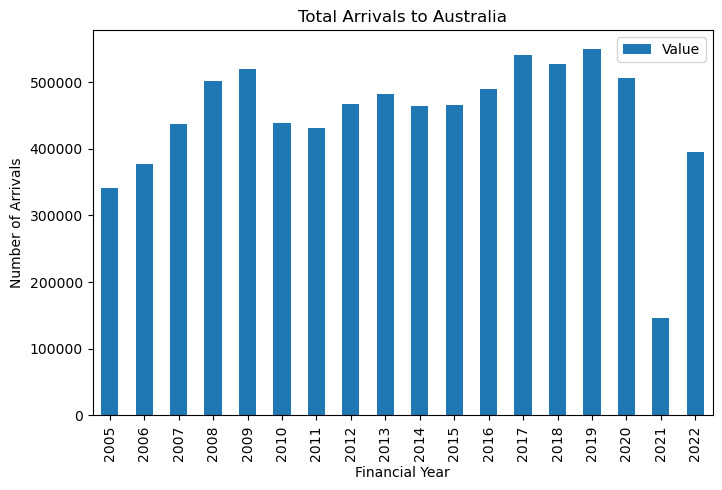

In [58]:
# Create a graph showing the total number of migrations 
total_arrivals_df.plot(kind="bar", x="Year", y="Value", figsize=(8,5), title="Total Arrivals to Australia")
plt.xlabel("Financial Year")
plt.ylabel("Number of Arrivals")
plt.legend(loc="best")
plt.show()

In [38]:
# Create a graph showing the total number of migrations 
region_data = gender_data_df.groupby(["Year", "Region"])["Value"].sum()
region_data_df = region_data.reset_index() 
region_data_df = region_data_df.pivot(index="Year", columns="Region", values="Value")
region_data_df = region_data_df.rename(columns={"1: New South Wales":"NSW", "2: Victoria":"VIC", 
                                                "3: Queensland": "QLD", "4: South Australia":"SA",
                                                "5: Western Australia": "WA", "6: Tasmania": "TAS",
                                                "7: Northern Territory":"NT", "8: Australian Capital Territory":"ACT"})
region_data_df

Region,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
Year,,,,,,,,
2005,125190,81270,65400,16620,40000,3160,4430,5390
2006,132750,89890,73090,20570,47190,3390,3950,5840
2007,150600,108600,86520,23520,53850,3430,4580,6420
2008,170960,123460,99680,25180,66140,3910,4720,7350
2009,169040,132690,103140,27260,69730,4310,5550,8230
2010,144220,109140,84920,24820,57940,4020,4680,8270
2011,141980,104940,84280,20160,64950,3480,4850,7270
2012,140880,112290,93210,23000,78010,3800,6770,9530
2013,152640,119270,92850,22630,74400,3930,7820,8690


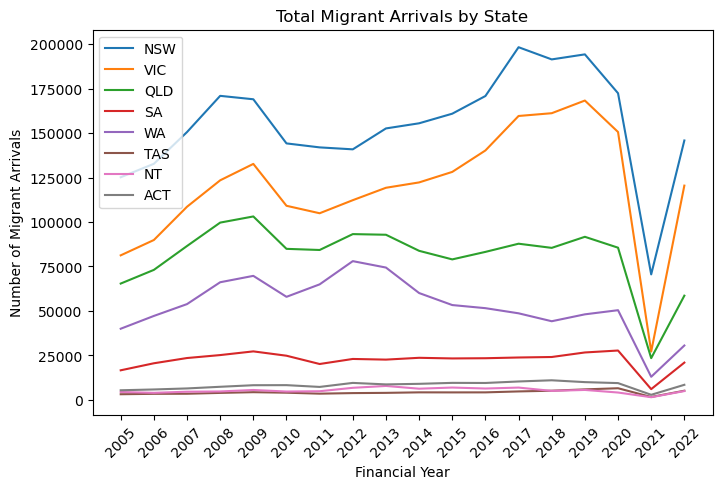

In [53]:
# Get the state with the most arrivals in all years
region_data_df.plot(kind="line", figsize=(8, 5), rot=45)
plt.legend(loc="best")
plt.title("Total Migrant Arrivals by State")
plt.xlabel("Financial Year")
plt.ylabel("Number of Migrant Arrivals")
plt.xticks(region_data_df.index)
plt.show()

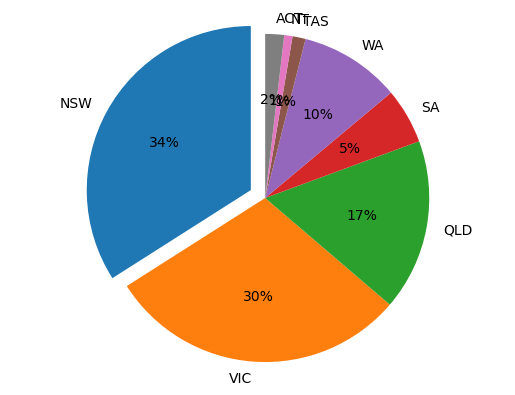

In [86]:
# What percentage of migrants are going to each region in 2020
labels = region_data_df.columns
sizes = region_data_df.loc[2020] / region_data_df.loc[2020].sum() * 100
explode = (0.1, 0, 0, 0, 0, 0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.0f%%", startangle=90)
plt.axis("equal")
plt.show()

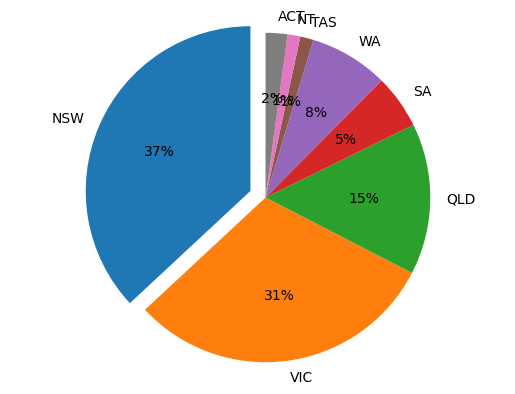

In [87]:
# What percentage of migrants are going to each region in 2022
sizes2 = region_data_df.loc[2022] / region_data_df.loc[2022].sum() * 100
plt.pie(sizes2, explode=explode, labels=labels, autopct="%1.0f%%", startangle=90)
plt.axis("equal")
plt.show()